In [2]:
import pandas as pd  # Manipulation des données
import numpy as np   # Calculs mathématiques
import matplotlib.pyplot as plt  # Visualisation
import seaborn as sns  # Visualisation avancée

# Afficher les graphiques directement dans le notebook
%matplotlib inline

In [3]:
df = pd.read_csv("Extended_Employee_Performance_and_Productivity_Data.csv", encoding='latin-1')
df_copy = df.copy()
df.head()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


In [5]:
df.groupby('Department')['Performance_Score'].agg(['mean' ,'std', 'min', 'max', 'count']).round(2)

,mean,std,min,max,count
Department,,,,,
Customer Support,3.00,1.41,1,5,11116
Engineering,3.02,1.42,1,5,10956
Finance,2.98,1.41,1,5,11200
HR,3.00,1.41,1,5,10960
IT,3.00,1.42,1,5,11131
Legal,2.98,1.42,1,5,11118
Marketing,2.98,1.41,1,5,11216
Operations,3.01,1.41,1,5,11181
Sales,2.99,1.41,1,5,11122


In [13]:
variables = [
    'Work_Hours_Per_Week',
    'Overtime_Hours',
    'Projects_Handled',
    'Performance_Score',
    'Remote_Work_Frequency',
    'Team_Size',
    'Monthly_Salary'
]

results = []

for var in variables:
    model = ols(f'{var} ~ C(Department)', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    p_value = anova_table['PR(>F)'].iloc[0]
    results.append({'Variable': var, 'p-value': p_value})

anova_results = pd.DataFrame(results).sort_values(by='p-value')
print(anova_results)

                Variable   p-value
2       Projects_Handled  0.086352
1         Overtime_Hours  0.137032
6         Monthly_Salary  0.450007
3      Performance_Score  0.467323
5              Team_Size  0.555197
4  Remote_Work_Frequency  0.614068
0    Work_Hours_Per_Week  0.801844


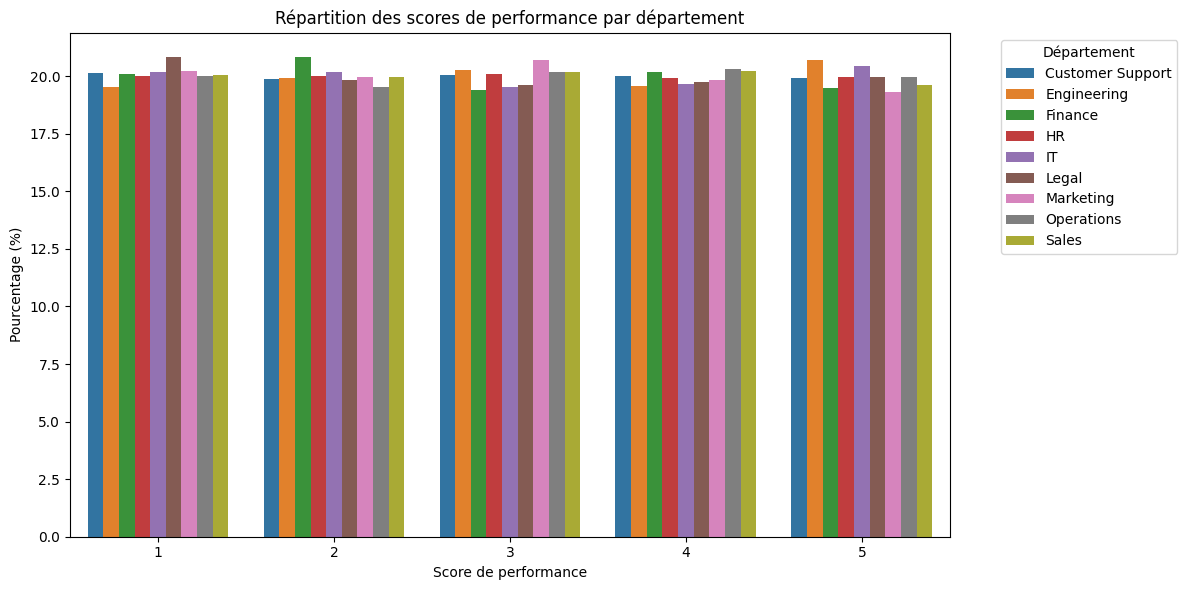

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=grouped,
    x='Performance_Score',
    y='Percentage',
    hue='Department'
)
plt.title("Répartition des scores de performance par département")
plt.ylabel("Pourcentage (%)")
plt.xlabel("Score de performance")
plt.legend(title="Département", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
